In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

c. EDA

In [2]:
df_customer = pd.read_csv('/work/customer_data.csv')
df_customer

,id,full_name,email,phone,address,signup_date,name,gender,age
0,1,Kara Kim,kara.kim1924@yahoo.com,804-681-7662,"8971 Pine Ave, Greenville, TX 76366",2022-03-13,Elena,Female,60
1,2,Kelly Peterson,NaN,(467) 700-2147,"7619 Cedar Ln, Madison, CA 32004",10/04/2019,Bob,Female,50
2,3,Henry Martin,henry.martin0365@mail.com,(378) 615-9326,"785 Elm St, Centerville, FL 70040",01/11/2019,Carlos,Male,36
3,4,Walter Evans,walter.evans9757@hotmail.com,406-811-1412,"9383 Elm St, Springfield, TX 27467",09/22/2021,Diana,Female,64
4,5,William Anderson,william.anderson8799@gmail.com,260-206-8340,"615 Sunset Blvd, Riverside, IL 02711",11/15/2020,George,Female,29
...,...,...,...,...,...,...,...,...,...
995,996,Kevin White,kevin.white6863@protonmail.com,(742) 990-9163,NaN,12/08/2019,George,Female,54
996,997,Kyle Mitchell,kyle.mitchell7313@protonmail.com,(905) 994-3879,"6248 Oak St, Georgetown, IL 43690",06/09/2019,Carlos,Male,25
997,998,Holly Chavez,holly.chavez9133@gmail.com,(410) 204-3172,"1969 Pine Ave, Springfield, TX 21039",08/31/2020,Carlos,Male,43
998,999,Frank Foster,frank.foster6200@protonmail.com,609-287-1080,"7204 Elm St, Centerville, IL 00057",09/18/2022,Frank,Female,23


In [3]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           1000 non-null   int64 
 1   full_name    916 non-null    object
 2   email        892 non-null    object
 3   phone        902 non-null    object
 4   address      897 non-null    object
 5   signup_date  902 non-null    object
 6   name         1000 non-null   object
 7   gender       1000 non-null   object
 8   age          1000 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 70.4+ KB


In [4]:
df_customer.isnull().sum()

id               0
full_name       84
email          108
phone           98
address        103
signup_date     98
name             0
gender           0
age              0
dtype: int64

In [5]:
#signup_date unique values
df_customer['signup_date'].unique()

array(['2022-03-13', '10/04/2019', '01/11/2019', '09/22/2021',
       '11/15/2020', '2023-10-23', '2021-02-14', '2023-11-05',
       '2023-03-20', '24-09-2019', '2019-05-18', '12/21/2023',
       '10/31/2020', '2020-10-06', '12/19/2021', '02/04/2023',
       '16-01-2022', '01/01/2022', '28-02-2023', '05/28/2023',
       '11/05/2022', '2022-01-24', '10/27/2023', '2019-01-27',
       '05/13/2022', '12-06-2022', '2019-11-08', '05/26/2023',
       '04/15/2023', nan, '09/25/2021', '2022-03-21', '11/27/2022',
       '07/22/2020', '12/24/2020', '2019-12-10', '2021-04-16',
       '02/22/2019', '09/19/2020', '05/25/2022', '2022-02-12',
       '11/04/2019', '2020-05-22', '08/07/2023', '10/21/2020',
       '23-02-2020', '2021-06-22', '2021-03-02', '2020-03-05',
       '19-07-2021', '01/31/2021', '09-05-2019', '10/03/2022',
       '29-09-2020', '05/24/2022', '01/10/2023', '2019-10-18',
       '2023-12-17', '02/07/2022', '2021-08-25', '18-05-2020',
       '2022-12-22', '11-09-2021', '09/24/2020', '

In [6]:
# Función para detectar el formato de signup_date
def detect_format(date_str):
    if pd.isna(date_str):
        return 'missing'
    if re.match(r'^\d{4}-\d{2}-\d{2}$', date_str):
        return 'YYYY-MM-DD'
    elif re.match(r'^\d{2}/\d{2}/\d{4}$', date_str):
        return 'MM/DD/YYYY'
    elif re.match(r'^\d{2}-\d{2}-\d{4}$', date_str):
        return 'DD-MM-YYYY'
    else:
        return 'unknown'

In [7]:
dates = pd.DataFrame({'signup_date': df_customer['signup_date']})
dates['date_format'] = dates['signup_date'].apply(detect_format)

print(dates['date_format'].value_counts())


date_format
MM/DD/YYYY    380
YYYY-MM-DD    320
DD-MM-YYYY    202
missing        98
Name: count, dtype: int64


In [8]:
df_customer.loc[df_customer['age'] > 100]

,id,full_name,email,phone,address,signup_date,name,gender,age
115,116,Jack Brown,jack.brown0531@mail.com,(205) 482-7687,"6605 Main St, Franklin, IL 72383",2021-09-14,Diana,Female,150
268,269,Frank Nelson,frank.nelson3298@protonmail.com,NaN,"528 Maple Dr, Fairview, IL 78175",NaN,Hannah,Female,120
354,355,Zoey Morgan,zoey.morgan9930@hotmail.com,NaN,"1821 Pine Ave, Georgetown, NY 35307",NaN,Carlos,Male,120
451,452,NaN,quentin.ramirez7039@protonmail.com,(279) 584-1951,"952 Oak St, Greenville, NY 78494",2021-05-24,Hannah,Male,150
469,470,Penelope Green,penelope.green5896@hotmail.com,(993) 990-9692,"8659 Cedar Ln, Franklin, CA 59227",14-06-2022,Carlos,Male,150
532,533,Quincy Cook,quincy.cook6130@outlook.com,(783) 649-6621,"4422 Maple Dr, Apt 26, Centerville, NY 74139",07/08/2019,Alice,Female,150
596,597,Catherine Kelly,catherine.kelly6637@outlook.com,715-354-1280,"5814 Lakeview Dr, Apt 78, Greenville, FL 71849",07/11/2022,George,Female,120
622,623,Rebecca Edwards,rebecca.edwards8287@aol.com,804-516-7409,"3805 Lakeview Dr, Centerville, NY 92649",04/08/2020,Frank,Female,120
681,682,Logan Miller,NaN,450-376-2484,"1693 Maple Dr, Apt 42, Georgetown, NY 59367",05/24/2019,Alice,Female,150
919,920,Xena Ruiz,xena.ruiz6918@mail.com,+1 (484) 386-1897,"7998 Washington Blvd, Apt 22, Arlington, IL 90718",NaN,Diana,Female,150


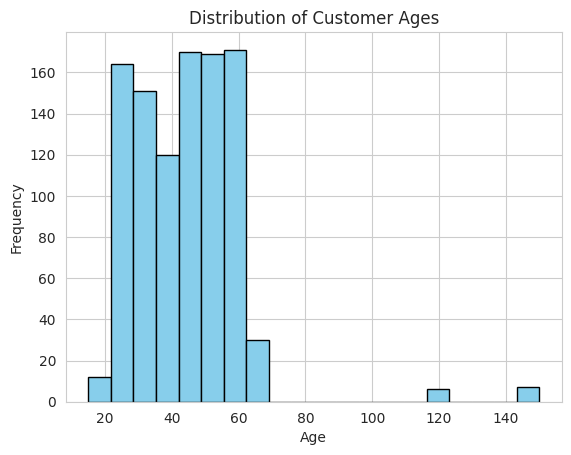

In [9]:
sns.set_style("whitegrid")

# Plotting the distribution of ages
df_customer['age'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Customer Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [10]:
df_customer['age'].mean()

43.854

/tmp/ipykernel_553/3363031997.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=df_customer, palette='pastel')


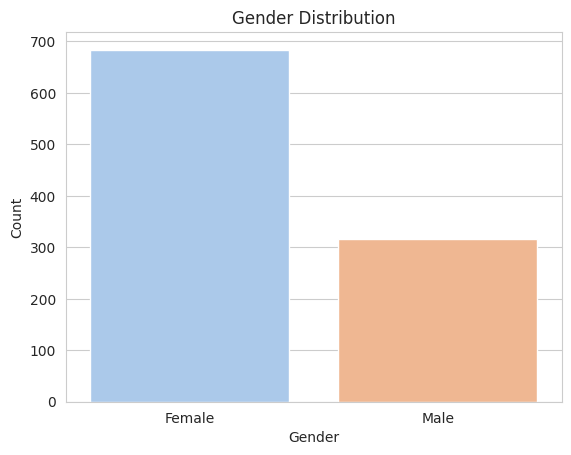

In [11]:
# Plotting the gender distribution
sns.countplot(x='gender', data=df_customer, palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

/tmp/ipykernel_553/3950559984.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='age', data=df_customer, palette='pastel')


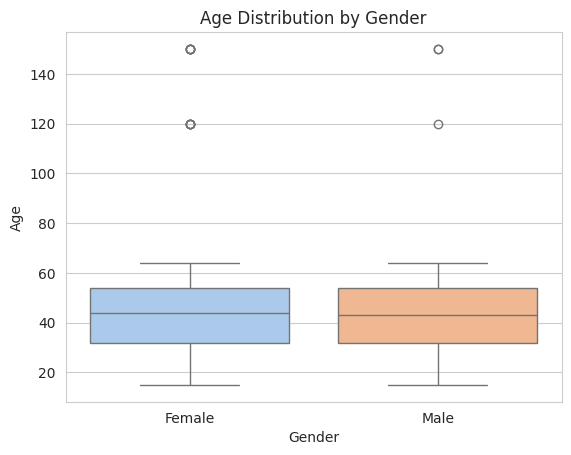

In [12]:
#plotting the age distribution by gender
sns.boxplot(x='gender', y='age', data=df_customer, palette='pastel')
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

In [13]:
df_retail = pd.read_csv('/work/retail_data.csv')
df_retail

,customer_id,purchase_date,product_category,amount,transaction_id
0,230,2025-05-11,Clothing,181.73,1034
1,630,2025-06-19,Electronics,442.32,1020
2,867,2025-02-16,Home & Kitchen,263.12,1049
3,763,2025-02-13,Home & Kitchen,434.05,1058
4,758,2025-04-15,Clothing,489.6,1077
...,...,...,...,...,...
815,494,2025-04-25,Clothing,61.89,1065
816,555,2025-03-04,Sports,74.31,1061
817,491,2025-03-14,Toys,33.54,1096
818,13,2025-06-19,Electronics,371.75,1070


In [14]:
df_retail.rename(columns={'customer_id': 'transaction_id'}, inplace=True)
df_retail.rename(columns={'id': 'customer_id'}, inplace=True)
df_retail

,customer_id,purchase_date,product_category,amount,transaction_id
0,230,2025-05-11,Clothing,181.73,1034
1,630,2025-06-19,Electronics,442.32,1020
2,867,2025-02-16,Home & Kitchen,263.12,1049
3,763,2025-02-13,Home & Kitchen,434.05,1058
4,758,2025-04-15,Clothing,489.6,1077
...,...,...,...,...,...
815,494,2025-04-25,Clothing,61.89,1065
816,555,2025-03-04,Sports,74.31,1061
817,491,2025-03-14,Toys,33.54,1096
818,13,2025-06-19,Electronics,371.75,1070


In [15]:
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer_id       820 non-null    int64 
 1   purchase_date     796 non-null    object
 2   product_category  796 non-null    object
 3   amount            796 non-null    object
 4   transaction_id    820 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 32.2+ KB


In [16]:
df_retail['transaction_id'].duplicated().sum()

720

In [17]:
df_retail[df_retail['transaction_id'] == 1018]

,customer_id,purchase_date,product_category,amount,transaction_id
5,332,NaN,Home & Kitchen,75.58,1018
9,349,2025-08-22,Home & Kitchen,169.43,1018
233,45,2025-02-01,Toys,213.8,1018
264,211,2025-08-25,Clothing,214.16,1018
345,921,2025-09-08,Toys,358.41,1018
373,71,2025-06-22,Sports,36.5,1018
664,549,2025-04-21,Electronics,224.47,1018
714,93,2025-08-30,Clothing,231.56,1018
733,992,2025-06-13,NaN,444.76,1018
743,468,2025-05-17,Toys,325.67,1018


In [18]:
df_retail.isnull().sum()

customer_id          0
purchase_date       24
product_category    24
amount              24
transaction_id       0
dtype: int64

/tmp/ipykernel_553/4210467779.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='product_category', data=df_retail, palette='pastel')


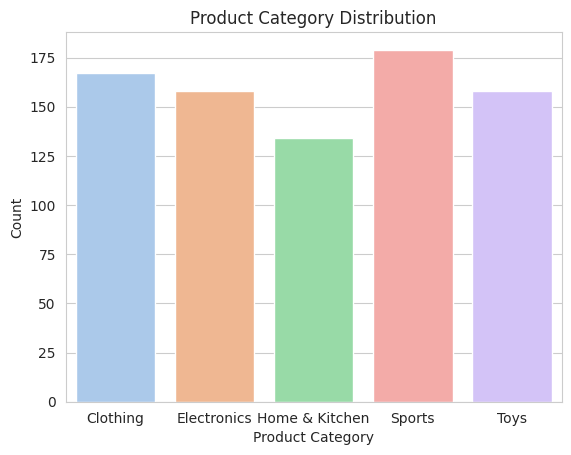

In [19]:
#plotting the distribution of product_category
sns.countplot(x='product_category', data=df_retail, palette='pastel')
plt.title('Product Category Distribution')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.show()

d. Exploratory Quality Check using Great Expectations

In [20]:
!pip install great_expectations


[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [63]:
import great_expectations as gx
from great_expectations.expectations.core import (
    ExpectColumnValuesToNotBeNull,
    ExpectColumnValuesToBeUnique,
    ExpectColumnValuesToMatchStrftimeFormat,
    ExpectColumnValuesToMatchRegex,
    ExpectColumnValuesToBeBetween,
    ExpectColumnValueLengthsToBeBetween,
)

In [66]:
# Get the Ephemeral Data Context
context = gx.get_context()
assert type(context).__name__ == "EphemeralDataContext"

In [69]:
# Add a Pandas Data Source
data_source_name = "customer_retail_calidad_datos_source"
data_source = context.data_sources.add_pandas(name=data_source_name)

# Add a Data Asset to the Data Source
customer_asset = data_source.add_dataframe_asset(name="customer_data_asset")
retail_asset   = data_source.add_dataframe_asset(name="retail_data_asset")


In [72]:
#Add the batch definitions

customer_batch_definition_name = "customer_batch"
retail_batch_definition_name   = "retail_batch"

customer_batch_definition = customer_asset.add_batch_definition_whole_dataframe(
    customer_batch_definition_name
)
retail_batch_definition = retail_asset.add_batch_definition_whole_dataframe(
    retail_batch_definition_name
)


In [75]:
# Validate the batch definitions
assert customer_batch_definition.name == customer_batch_definition_name
assert retail_batch_definition.name == retail_batch_definition_name

In [78]:
batch_parameters = {"dataframe": df_customer}
customer_batch = customer_batch_definition.get_batch({"dataframe": df_customer})

In [81]:
batch_parameters = {"dataframe": df_retail}
retail_batch = retail_batch_definition.get_batch({"dataframe": df_retail})

In [84]:
# Create an Expectation Suite
expectation_suite_name = "clientes_calidad_datos_suite"
suite = gx.ExpectationSuite(name=expectation_suite_name)

Exploratory Quality Check ENTRADA 

Customer data 

In [29]:
# Define expectations for the customer data

# Expect column values to not be null
suite.add_expectation(
    ExpectColumnValuesToNotBeNull(column="id")
)
suite.add_expectation(
    ExpectColumnValuesToNotBeNull(column="full_name")
)
suite.add_expectation(
    ExpectColumnValuesToNotBeNull(column="email")
)
suite.add_expectation(
    ExpectColumnValuesToNotBeNull(column="phone")
)
suite.add_expectation(
    ExpectColumnValuesToNotBeNull(column="address")
)
suite.add_expectation(
    ExpectColumnValuesToNotBeNull(column="signup_date")
)
suite.add_expectation(
    ExpectColumnValuesToNotBeNull(column="name")
)
suite.add_expectation(
    ExpectColumnValuesToNotBeNull(column="gender")
)
suite.add_expectation(
    ExpectColumnValuesToNotBeNull(column="age")
)

# Expect column values to be unique
suite.add_expectation(
    ExpectColumnValuesToBeUnique(column="id")
)

# Expect column values to match strftime format
suite.add_expectation(
    ExpectColumnValuesToMatchStrftimeFormat(column="signup_date", strftime_format="%Y-%m-%d")
)

# Expect valid email format
suite.add_expectation(
    ExpectColumnValuesToMatchRegex(column="email", regex=r"^[\w\.-]+@[\w\.-]+\.\w+$")
)

# Expect valid phone number format
suite.add_expectation(
    ExpectColumnValuesToMatchRegex(column="phone", regex=r"^(\+\d{1,2}\s?)?\(?\d{3}\)?[-.\s]?\d{3}[-.\s]?\d{4}$")
)
# Expect valid age format
suite.add_expectation(
    ExpectColumnValuesToBeBetween(column="age", min_value=1, max_value=100)
)

context.suites.add(suite)

{
  "name": "clientes_calidad_datos_suite",
  "id": "fed2fa6d-5314-4121-a666-bb11b605edcf",
  "expectations": [
    {
      "type": "expect_column_values_to_not_be_null",
      "kwargs": {
        "column": "id"
      },
      "meta": {},
      "id": "de9404a7-4e6e-4375-adfb-077e1ddecee3",
      "severity": "critical"
    },
    {
      "type": "expect_column_values_to_not_be_null",
      "kwargs": {
        "column": "full_name"
      },
      "meta": {},
      "id": "c46e7241-d9dd-42e3-a931-222ca80f0779",
      "severity": "critical"
    },
    {
      "type": "expect_column_values_to_not_be_null",
      "kwargs": {
        "column": "email"
      },
      "meta": {},
      "id": "6ebaefe3-9056-42ac-8e2e-1576852850d3",
      "severity": "critical"
    },
    {
      "type": "expect_column_values_to_not_be_null",
      "kwargs": {
        "column": "phone"
      },
      "meta": {},
      "id": "13959b4d-5012-467f-82fa-5b1e7f42fab8",
      "severity": "critical"
    },
    {
      "ty

In [30]:
# Validate the Data Against the Suite
validation_results_customer = customer_batch.validate(suite)
# Evaluate the Results
print(validation_results_customer)


Calculating Metrics:   4%|▍         | 3/73 [00:00<00:00, 1269.72it/s]/root/venv/lib/python3.10/site-packages/great_expectations/expectations/metrics/column_map_metrics/column_values_match_regex.py:41: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  return column.astype(str).str.contains(regex)
Calculating Metrics: 100%|██████████| 73/73 [00:00<00:00, 3187.49it/s]{
  "success": false,
  "results": [
    {
      "success": true,
      "expectation_config": {
        "type": "expect_column_values_to_not_be_null",
        "kwargs": {
          "batch_id": "customer_retail_calidad_datos_source-customer_data_asset",
          "column": "id"
        },
        "meta": {},
        "id": "de9404a7-4e6e-4375-adfb-077e1ddecee3",
        "severity": "critical"
      },
      "result": {
        "element_count": 1000,
        "unexpected_count": 0,
        "unexpected_percent": 0.0,
        "partial_unexpected_li

Exploratory Quality Check

Retail data

In [31]:
expectation_suite_name = "retail_calidad_datos_suite"
suite = gx.ExpectationSuite(name=expectation_suite_name)

In [32]:
# Define expectations for the retail data

# Expect column values to not be null
suite.add_expectation(
    ExpectColumnValuesToNotBeNull(column="customer_id")
)
suite.add_expectation(
    ExpectColumnValuesToNotBeNull(column="purchase_date")
)
suite.add_expectation(
    ExpectColumnValuesToNotBeNull(column="product_category")
)
suite.add_expectation(
    ExpectColumnValuesToNotBeNull(column="amount")
)
suite.add_expectation(
    ExpectColumnValuesToNotBeNull(column="transaction_id")
)


#Expect column values to not have duplicates

suite.add_expectation(
    ExpectColumnValuesToBeUnique(column="transaction_id")
)
suite.add_expectation(
    ExpectColumnValuesToBeUnique(column="customer_id")
)
suite.add_expectation(
    ExpectColumnValuesToBeUnique(column="purchase_date")
)
suite.add_expectation(
    ExpectColumnValuesToBeUnique(column="amount")
)

# Expect column values to be unique
suite.add_expectation(
    ExpectColumnValuesToBeUnique(column="transaction_id")
)

# Expect column values to match strftime format
suite.add_expectation(
    ExpectColumnValuesToMatchStrftimeFormat(column="purchase_date", strftime_format="%Y-%m-%d")
)

# Expect valid amount format
suite.add_expectation(
    ExpectColumnValuesToMatchRegex(column="amount", regex=r"^\d+(\.\d{1,2})?$")
)

context.suites.add(suite)

{
  "name": "retail_calidad_datos_suite",
  "id": "be661e8d-f885-4af9-8bc9-0ef0f7dba081",
  "expectations": [
    {
      "type": "expect_column_values_to_not_be_null",
      "kwargs": {
        "column": "customer_id"
      },
      "meta": {},
      "id": "554e8d84-152e-4a8e-bc88-dd007b65b65c",
      "severity": "critical"
    },
    {
      "type": "expect_column_values_to_not_be_null",
      "kwargs": {
        "column": "purchase_date"
      },
      "meta": {},
      "id": "a038c3c6-70b9-4e32-83e9-7f5c1ef941e6",
      "severity": "critical"
    },
    {
      "type": "expect_column_values_to_not_be_null",
      "kwargs": {
        "column": "product_category"
      },
      "meta": {},
      "id": "2cee8193-6246-44d5-a730-7ae8ccf1a142",
      "severity": "critical"
    },
    {
      "type": "expect_column_values_to_not_be_null",
      "kwargs": {
        "column": "amount"
      },
      "meta": {},
      "id": "ff7110fc-805d-44e7-905f-643c85a79868",
      "severity": "critical"

In [33]:
# Validate the Data Against the Suite
validation_results_retail = retail_batch.validate(suite)
# Evaluate the Results
print(validation_results_retail)

          611,
          307,
          57,
          181,
          158,
          486,
          886,
          74,
          104,
          307,
          360,
          57,
          285,
          877
        ],
        "missing_count": 0,
        "missing_percent": 0.0,
        "unexpected_percent_total": 4.878048780487805,
        "unexpected_percent_nonmissing": 4.878048780487805,
        "partial_unexpected_counts": [
          {
            "value": 57,
            "count": 2
          },
          {
            "value": 285,
            "count": 2
          },
          {
            "value": 307,
            "count": 2
          },
          {
            "value": 74,
            "count": 1
          },
          {
            "value": 104,
            "count": 1
          },
          {
            "value": 158,
            "count": 1
          },
          {
            "value": 181,
            "count": 1
          },
          {
            "value": 210,
            "co

we'll define the following simple expectations for customers:

- expect column values to not be null

- expect column values to be unique ("id")

- expect_column_values_to_match_strftime_format("signup_date", "%Y-%m-%d") and datetime type

- expect valid emails "email", r"^[\w\.-]+@[\w\.-]+\.\w+$"

- expect phone numbers with a matching format 

we'll define the following simple expectations for  retail:

- expect column values to not be null

- expect transaction_id to be unique

- expect_column_values_to_match_strftime_format("signup_date", "%Y-%m-%d") and datetime type

- expect cuantity values to be numerical (amount)

In [120]:
df_customer_clean = pd.read_csv('customer_data_clean.csv')
df_retail_clean = pd.read_csv('retail_data_clean.csv')

In [123]:
# Add a Pandas Data Source
data_source_clean_name = "customer_retail_limpio_datos_source"
data_source = context.data_sources.add_pandas(name=data_source_clean_name)

# Add a Data Asset to the Data Source
customer_clean_asset = data_source.add_dataframe_asset(name="customer_data_clean_asset")
retail_clean_asset   = data_source.add_dataframe_asset(name="retail_data_clean_asset")

DataContextError: Can not write the fluent datasource customer_retail_limpio_datos_source because a datasource of that name already exists in the data context.

In [126]:
#Add the batch definitions
customer_batch_clean_definition_name = "customer_clean_batch"
retail_batch_clean_definition_name   = "retail_clean_batch"

customer_batch_clean_definition = customer_asset.add_batch_definition_whole_dataframe(
    customer_batch_clean_definition_name
)
retail_batch_clean_definition = retail_asset.add_batch_definition_whole_dataframe(
    retail_batch_clean_definition_name
)


ValueError: "customer_clean_batch" already exists (all existing batch_definition names are customer_batch, customer_clean_batch)

In [129]:
# Validate the batch definitions
assert customer_batch_clean_definition.name == customer_batch_clean_definition_name
assert retail_batch_clean_definition.name == retail_batch_clean_definition_name

In [132]:
batch_parameters = {"dataframe": df_customer_clean}
customer_clean_batch = customer_batch_clean_definition.get_batch({"dataframe": df_customer_clean})

In [135]:
batch_parameters = {"dataframe": df_retail_clean}
retail_clean_batch = retail_batch_clean_definition.get_batch({"dataframe": df_retail_clean})

In [138]:
import datetime as dt
today = dt.date.today().strftime("%Y-%m-%d")

# ======================
# Expectation Suite: Clientes
# ======================
expectation_suite_name = "clientes_calidad_datos_suite2"
clientes_suite2 = gx.ExpectationSuite(name=expectation_suite_name)

# 1. IDs deben ser únicos

clientes_suite2.add_expectation(
    ExpectColumnValuesToBeUnique(column="id")
)

# 2. signup_date con formato YYYY-MM-DD y en rango
clientes_suite2.add_expectation(
    ExpectColumnValuesToMatchRegex(column="signup_date", regex="^\\d{4}-\\d{2}-\\d{2}$")
)
clientes_suite2.add_expectation(
    ExpectColumnValuesToBeBetween(column="signup_date", min_value="2000-01-01", max_value=today)
)

# 4. Emails válidos
clientes_suite2.add_expectation(
    ExpectColumnValuesToMatchRegex(column="email", regex="[^@]+@[^@]+\\.[^@]+")
)

# 5. Teléfono con longitud válida (máximo 15 caracteres, mínimo 7 por ejemplo)
clientes_suite2.add_expectation(
    ExpectColumnValueLengthsToBeBetween(column="phone", min_value=7, max_value=18)
)    

# 6. Edad en rango 1-99
clientes_suite2.add_expectation(
    ExpectColumnValuesToBeBetween(column="age", min_value=1, max_value=99)
)


# ======================
# Expectation Suite: Compras
# ======================
expectation_suite_name = "compras_calidad_datos_suite2"
compras_suite = gx.ExpectationSuite(name=expectation_suite_name)

# 1. transaction_id no nulo y único

compras_suite.add_expectation(
    ExpectColumnValuesToBeUnique(column="transaction_id")
)

# 2. purchase_date con formato YYYY-MM-DD y en rango
compras_suite.add_expectation(
    ExpectColumnValuesToMatchRegex(column="purchase_date", regex="^\\d{4}-\\d{2}-\\d{2}$")
)
compras_suite.add_expectation(
    ExpectColumnValuesToBeBetween(column="purchase_date", min_value="2000-01-01", max_value=today)
)

# 3. amount numérico positivo con máximo 2 decimales
compras_suite.add_expectation(
    ExpectColumnValuesToMatchRegex(column="amount", regex="^\\d+(\\.\\d{1,2})?$")
)

context.suites.add(clientes_suite2)
context.suites.add(compras_suite)

DataContextError: Cannot add ExpectationSuite with name clientes_calidad_datos_suite2 because it already exists.

In [141]:
#verify the expectations
validation_results_customer = customer_batch.validate(clientes_suite2)
print(validation_results_customer)

Calculating Metrics:  89%|████████▊ | 39/44 [00:00<00:00, 1617.58it/s]{
  "success": false,
  "results": [
    {
      "success": false,
      "expectation_config": {
        "type": "expect_column_values_to_be_between",
        "kwargs": {
          "column": "signup_date",
          "min_value": "2000-01-01",
          "max_value": "2025-09-25",
          "batch_id": "customer_retail_calidad_datos_source-customer_data_asset"
        },
        "meta": {},
        "id": "adcf7f2f-971e-4593-9487-e43e1cf0dda9",
        "severity": "critical"
      },
      "result": {},
      "meta": {},
      "exception_info": {
        "MetricConfigurationID(metric_name='column_values.between.condition', metric_domain_kwargs_id='c9cc113dfaa4e2c73db5c19ceb787cf0', metric_value_kwargs_id='7c09f9a8ff59d42c9bf1ba673e9ce090')": {
          "exception_traceback": "Traceback (most recent call last):\n  File \"/root/venv/lib/python3.10/site-packages/great_expectations/execution_engine/execution_engine.py\", l

In [144]:
#verify the expectations
validation_results_retail = retail_batch.validate(compras_suite)
print(validation_results_retail)

Calculating Metrics:  10%|█         | 3/29 [00:00<00:00, 1382.74it/s]/root/venv/lib/python3.10/site-packages/great_expectations/expectations/metrics/column_map_metrics/column_values_match_regex.py:41: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  return column.astype(str).str.contains(regex)
Calculating Metrics:  10%|█         | 3/29 [00:00<00:00, 427.02it/s] /root/venv/lib/python3.10/site-packages/great_expectations/expectations/metrics/column_map_metrics/column_values_match_regex.py:41: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  return column.astype(str).str.contains(regex)
Calculating Metrics:  10%|█         | 3/29 [00:00<00:00, 258.17it/s]/root/venv/lib/python3.10/site-packages/great_expectations/expectations/metrics/column_map_metrics/column_values_match_regex.py:41: UserWarning: This pattern is interpr

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8827a6c5-c255-41ba-9603-9339500bd604' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>